<a href="https://colab.research.google.com/github/clizarraga-UAD7/ML-Notebooks/blob/main/MLClusteringAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An introduction to Clustering Analysis.



In [1]:
# Import initial libraries
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  


In [2]:
penguins = pd.read_csv("https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv")

culmen_columns = ['culmen_length_mm', 'culmen_depth_mm']
target_column = 'species'


In [3]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# Drop rows with missing numbers
penguins = penguins.dropna()

penguins.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


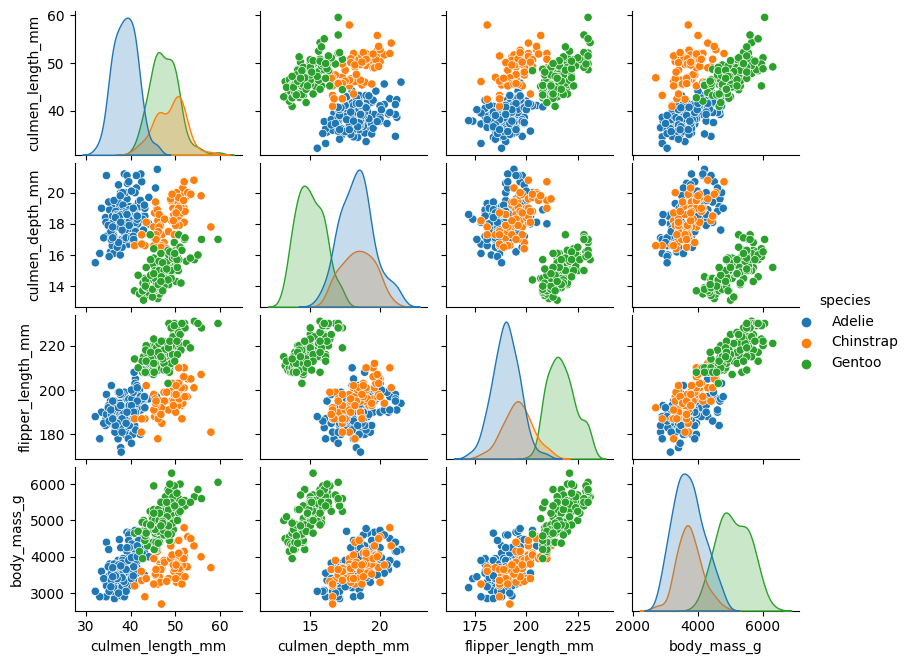

In [6]:
# Do a scatter plot to observe the samples distribution

pairplot_figure = sns.pairplot(penguins, hue='species')
pairplot_figure.fig.set_size_inches(9, 6.5)

In [7]:
#encoding categorical variables
y = penguins["species"]
penguins_main = penguins.iloc[:,1:]
X = pd.get_dummies(penguins_main)
X.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,0,1


In [8]:
len(X)

334

## [K-Means Algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-means)

The K-Means Algorithm clusters data by trying to separate samples in 
 groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters 
 to be specified.
 

In [9]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3,random_state=42)
k_means.fit(X[['culmen_depth_mm', 'culmen_length_mm' ]])


KMeans(n_clusters=3, random_state=42)

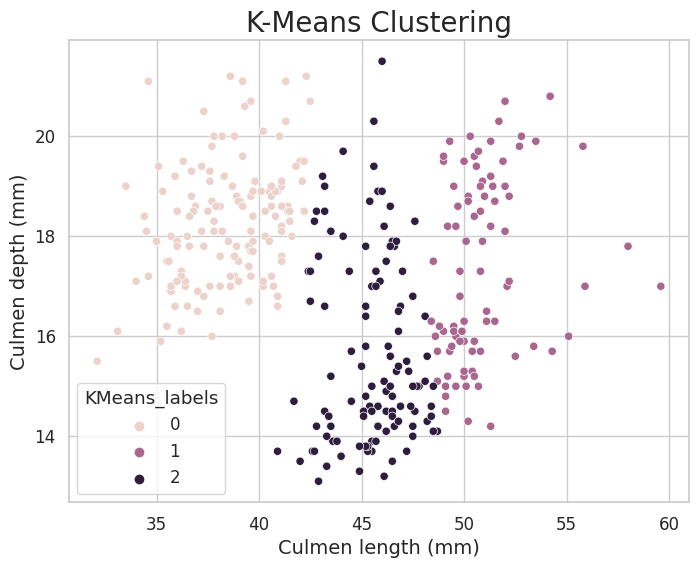

In [10]:
X['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
#colors=['purple','red','blue','green']

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8,6]})
sns.scatterplot(data=X, x='culmen_length_mm', y='culmen_depth_mm', hue='KMeans_labels')
plt.title('K-Means Clustering',fontsize=20)
plt.ylabel('Culmen depth (mm)',fontsize=14)
plt.xlabel('Culmen length (mm)',fontsize=14)
plt.show()


### [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)):
The Elbow Method is an empirical method to find the optimal number of clusters for a dataset. In this method, we pick a range of candidate values of k, then apply K-Means clustering using each of the values of k.

Find the average distance of each point in a cluster to its centroid, and represent it in a plot. Pick the value of k, where the average distance falls suddenly.

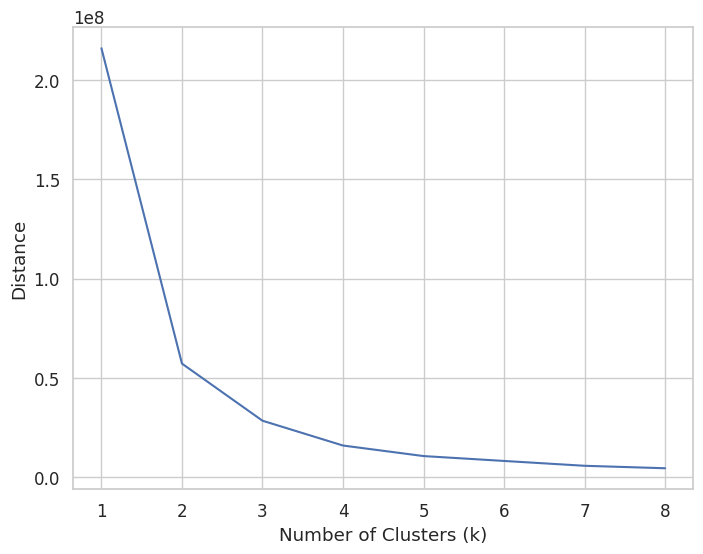

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.style as style

range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
avg_distance=[]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
  avg_distance.append(clusterer.inertia_)

#style.use("fivethirtyeight")
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()


With an increase in the number of clusters (k), the average distance decreases. To find the optimal number of clusters (k), observe the plot and find the value of k for which there is a sharp and steep fall of the distance. This is will be an optimal point of k where an elbow occurs.

This data is 2-D, so it's easy to visualize and pick the best value of k, which is k=4.

 For higher-dimensional data, we can employ the Silhouette Method to find the best k, which is a better alternative to Elbow Method.

### [Silhouette Method](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html):
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2 The average silhouette_score is : 0.5726434594796348
For n_clusters = 3 The average silhouette_score is : 0.48501027345331904
For n_clusters = 4 The average silhouette_score is : 0.4364616660655964
For n_clusters = 5 The average silhouette_score is : 0.4041434780920362
For n_clusters = 6 The average silhouette_score is : 0.4339597081178612


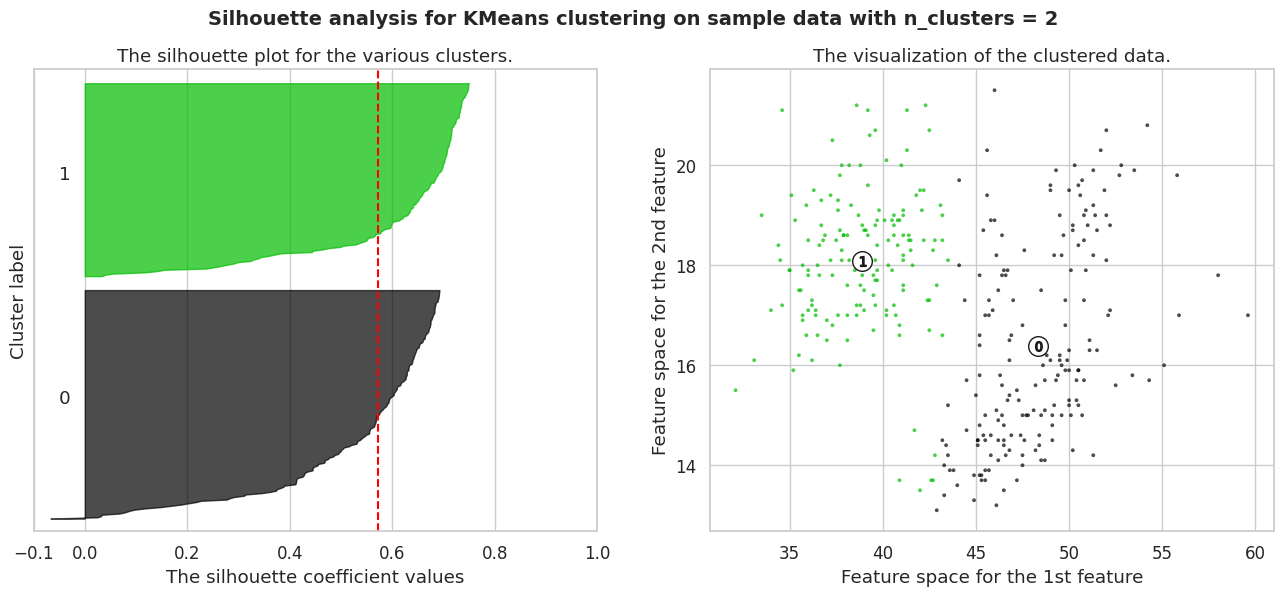

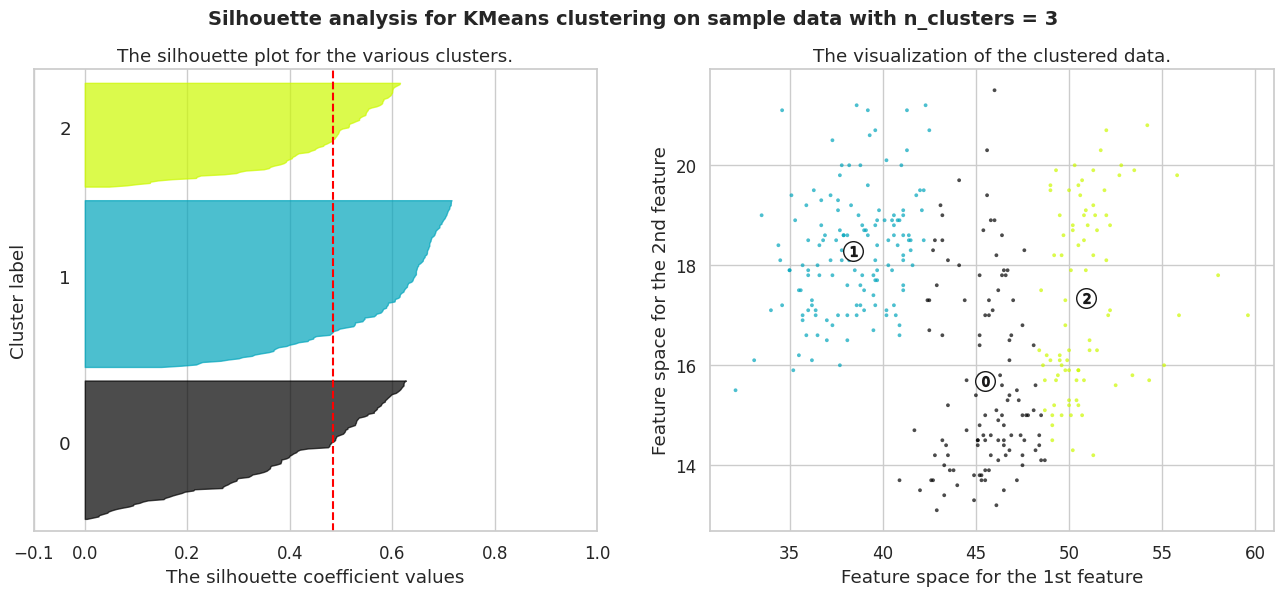

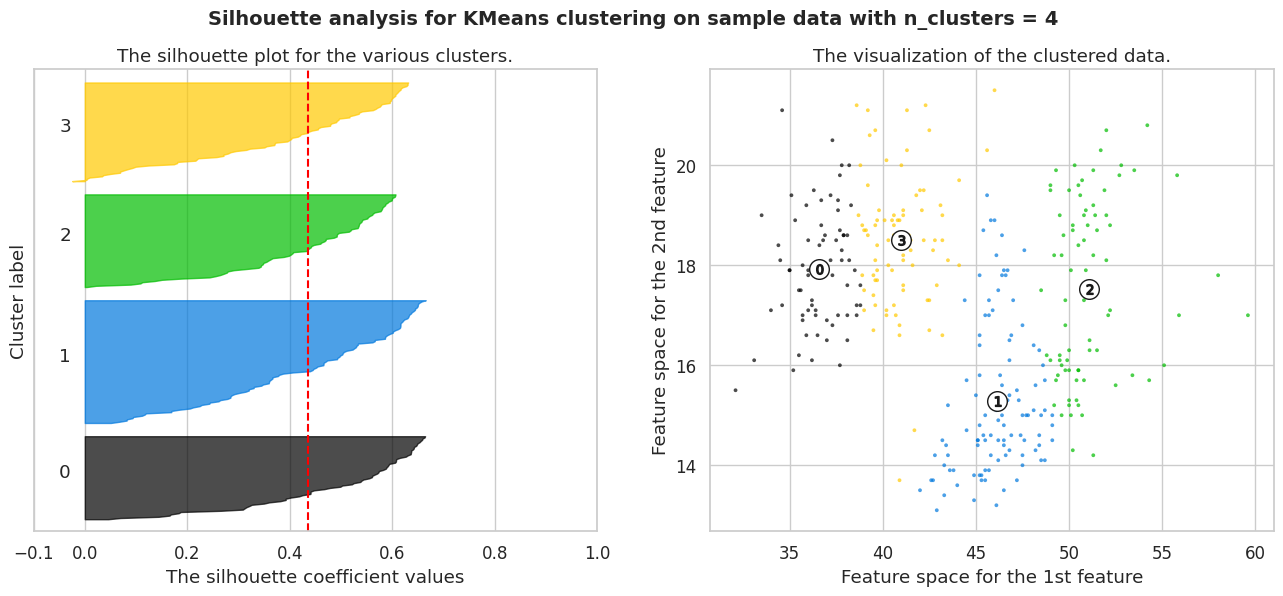

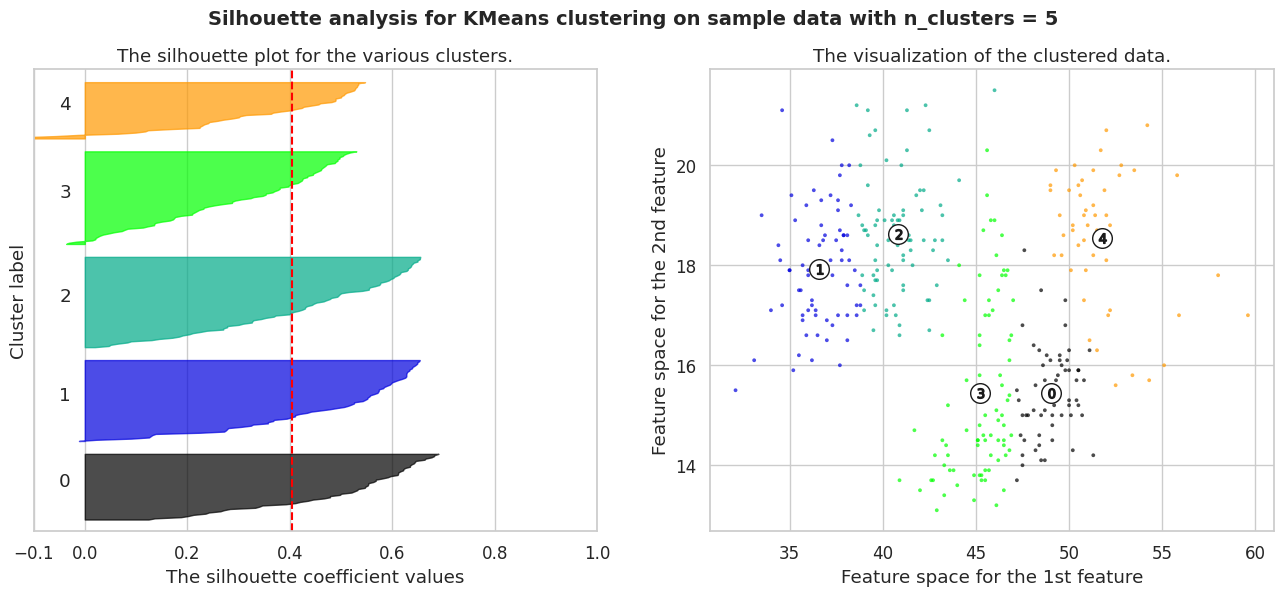

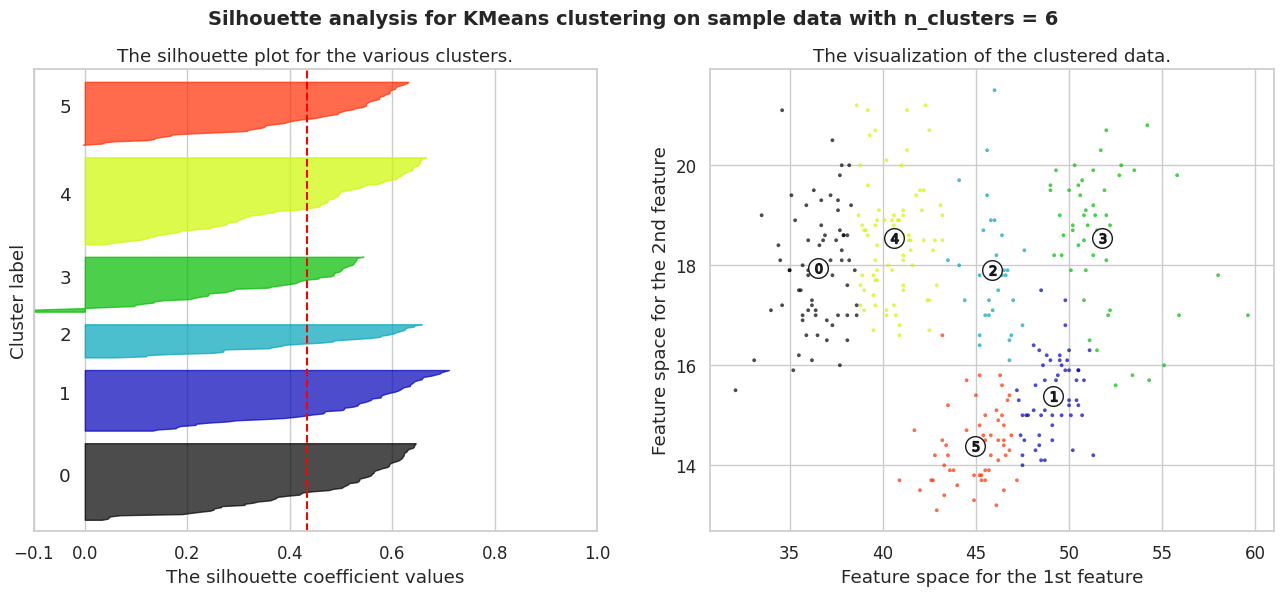

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

# Given

X = penguins[["culmen_length_mm", "culmen_depth_mm"]].values
y = penguins['species'].values

range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


We should select the plots which are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right. In this case n=3 is the one with silhouettes with similar width.

## [Hierarchichal Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

Hierachichal Clustering or AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

In [15]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')

model.fit(penguins[['culmen_length_mm', 'culmen_depth_mm']])

labels = model.labels_

print(
    "Silhouette Coefficient: %0.3f"
    % silhouette_score(X, labels, metric="sqeuclidean"))


Silhouette Coefficient: 0.537


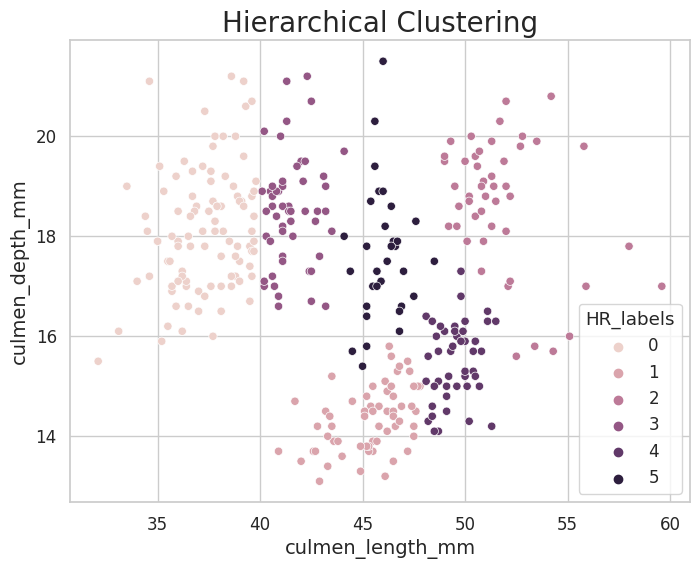

In [16]:
penguins['HR_labels']=model.labels_
# Plotting resulting clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=penguins, x='culmen_length_mm', y='culmen_depth_mm',hue='HR_labels')
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('culmen_length_mm',fontsize=14)
plt.ylabel('culmen_depth_mm',fontsize=14)
plt.show()


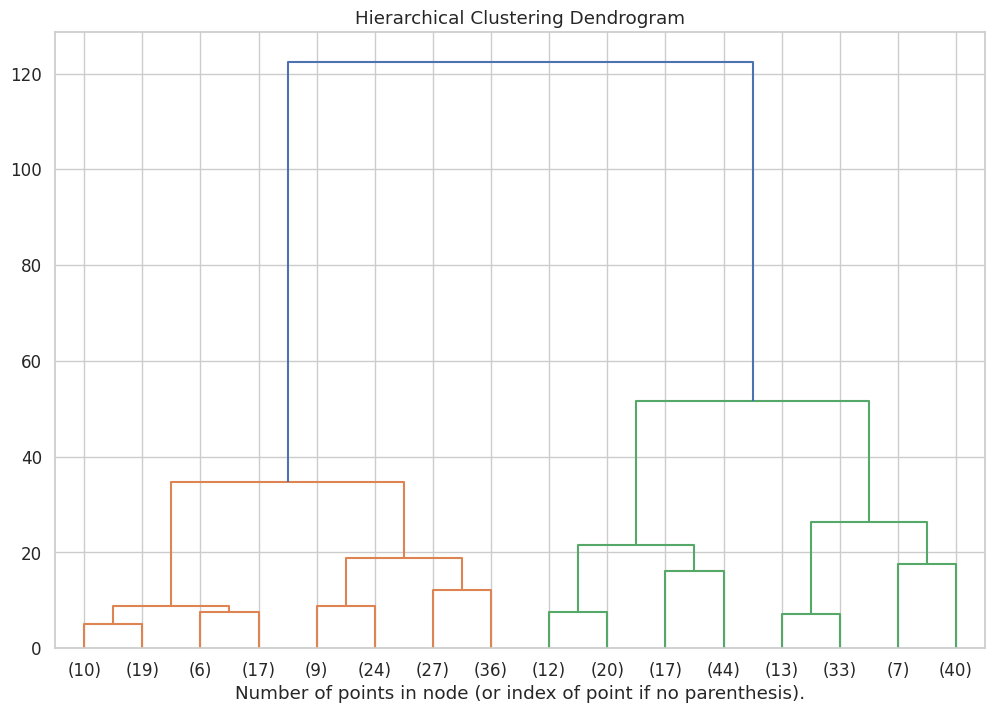

In [17]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = penguins[['culmen_length_mm', 'culmen_depth_mm']].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(12,8))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


### [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


dbscan=DBSCAN(eps=0.75, min_samples=15) # Need to play with these 2 parameters, 
                                                      # until you get at least 3 values for dbscan.labels_ 
dbscan.fit(penguins[['culmen_length_mm', 'culmen_depth_mm']])
print('Unique labels dbscan.labels_:', pd.unique(dbscan.labels_))

Unique labels dbscan.labels_: [-1  0  2  1]


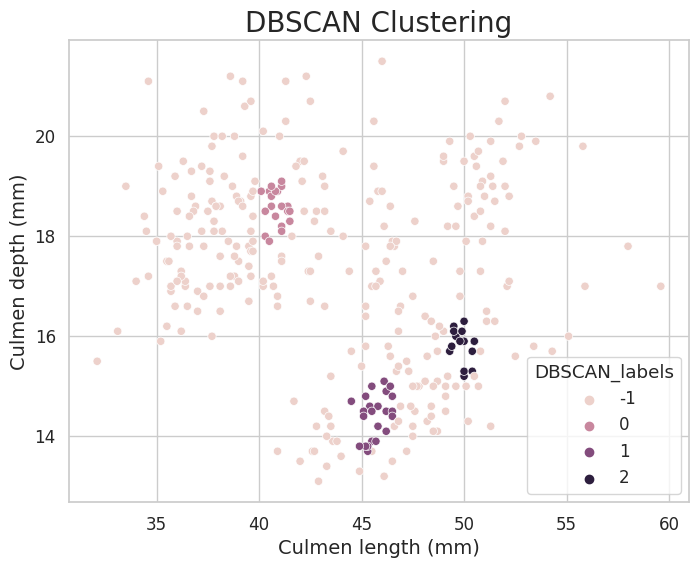

Silhouette Coefficient: -0.543


In [ ]:
penguins['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(8,6))
colors=['purple','red','blue','green']
sns.scatterplot(data=penguins, x='culmen_length_mm', y='culmen_depth_mm', hue='DBSCAN_labels')
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Culmen length (mm)',fontsize=14)
plt.ylabel('Culmen depth (mm)',fontsize=14)
plt.show()

print(
    "Silhouette Coefficient: %0.3f"
    % silhouette_score(X, dbscan.labels_, metric="sqeuclidean"))



## [OPTICS](https://scikit-learn.org/stable/modules/clustering.html#optics)

The OPTICS Algorithm shares many similarities with the DBSCAN algorithm, and can be considered a generalization of DBSCAN that relaxes the eps requirement from a single value to a value range. The key difference between DBSCAN and OPTICS is that the OPTICS algorithm builds a reachability graph, which assigns each sample both a reachability_ distance, and a spot within the cluster ordering_ attribute; these two attributes are assigned when the model is fitted, and are used to determine cluster membership.

In [11]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

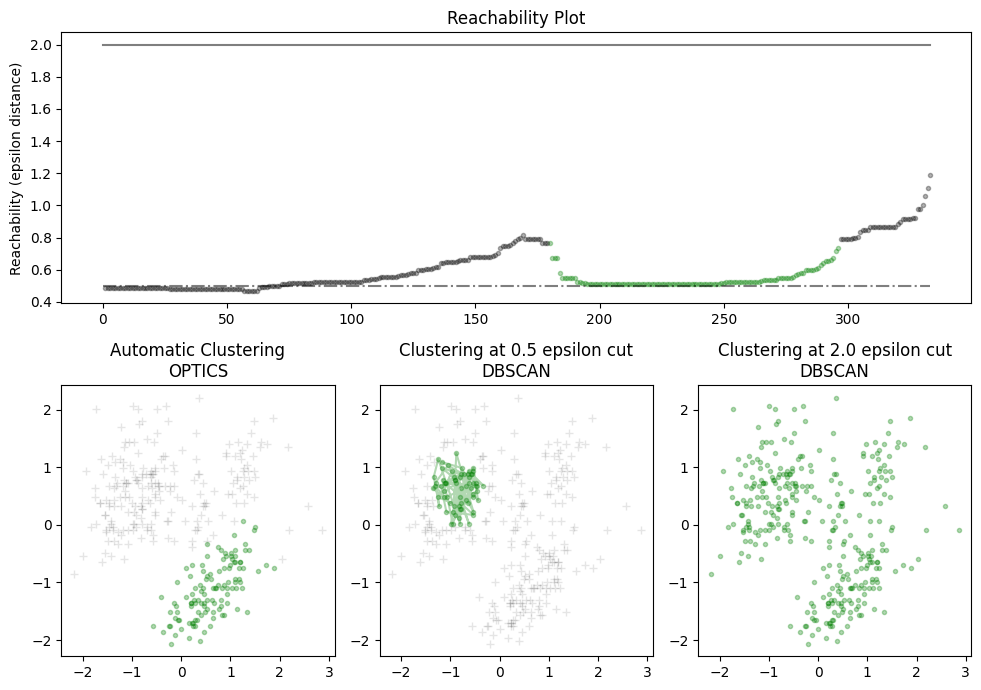

In [12]:
clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

X = penguins[['culmen_length_mm', 'culmen_depth_mm']].values
X = StandardScaler().fit_transform(X)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()


### [Mean Shift](https://scikit-learn.org/stable/modules/clustering.html#mean-shift)

Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.



In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth


X = penguins[['culmen_length_mm', 'culmen_depth_mm']].values
X = StandardScaler().fit_transform(X)


In [ ]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=300)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 3


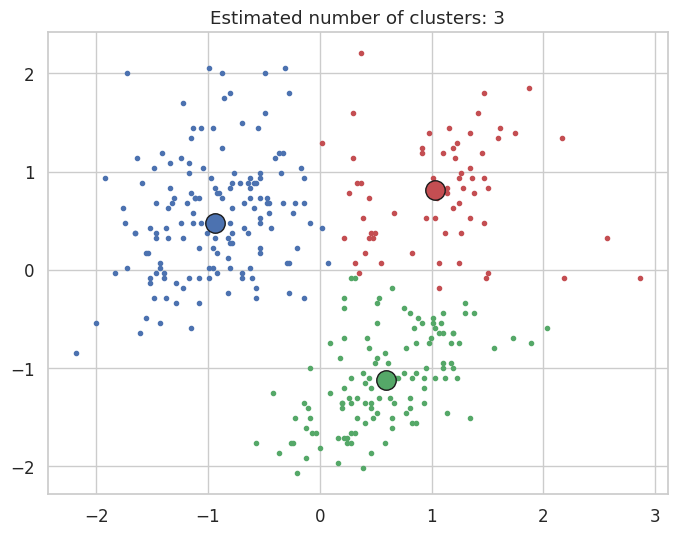

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()